# Red Nuronal

## Estado Planctónico Vs biofilm de Cepas de *S. aureus* [BAA-44, ATCC 29213 y ATCC 43300] Extración de Proteínas [AF:ACN] ##

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

# Etracción 1 #

In [2]:
import glob
fn = []
all_MS = pd.DataFrame()
#nombres=['MF']
for f in glob.glob("C:/Users/Usuario/OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER/Documents/Analisis_Datos_Quimica-main/Datos plan B/29213-43300/Extracción 1/*.txt"):
    df = pd.read_csv(f, header=None, delimiter=' ' )
    all_MS = pd.concat([all_MS, df], axis=1)
    fn.append(f) # Guardamos parte del nombre del archivo como una etiqueta de cada muestra
Datamz = all_MS[0] # realciones m/z
Data = all_MS[1] # Intensidades

In [3]:
DataIn=Data[0:20480]
DataIn.columns=range(DataIn.shape[1])
DataMz=Datamz[0:20480]
DataMz.columns=range(DataMz.shape[1])

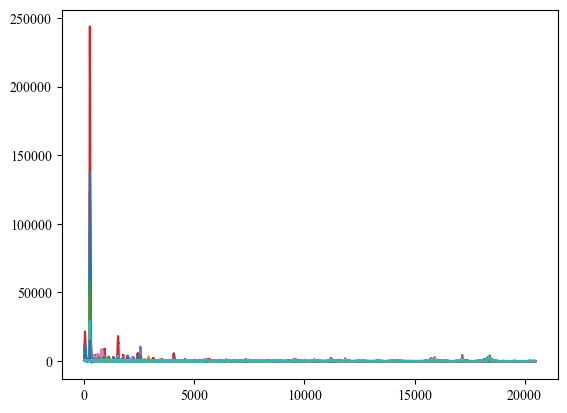

In [16]:
plt.plot(DataIn);

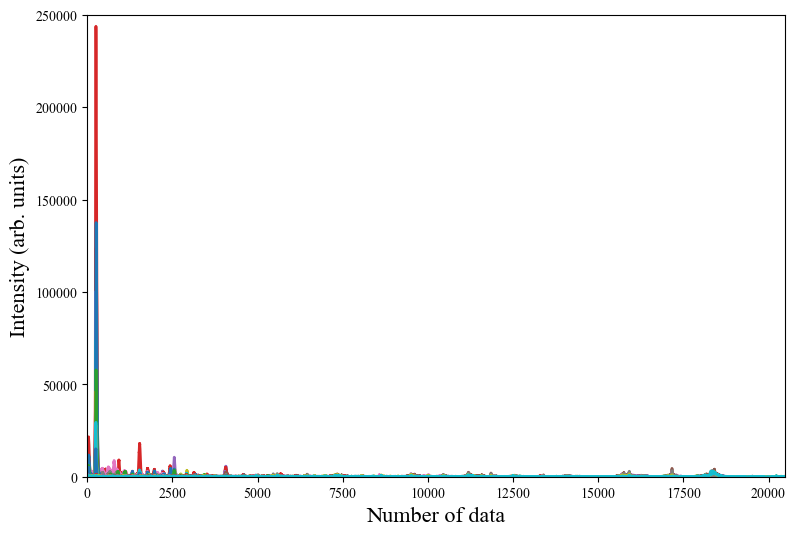

In [29]:
#DataMz.columns=range(DataMz.shape[1]) # Aquí le ponemos indices ordenados a las columnsa de las intensidades los espectros defectuosos
#DataInt=DataIn.drop([520, 458], axis=1) # Eliminamos de los datos de intensidad
#DataMzt = DataMz.drop([520, 458], axis=1) # Elminamos de los datos de la relación m/z los espectros defectuosos
#fn1 = pd.DataFrame(fn).drop([520, 458], axis=0) # Eliminamos de las etiquetas los espectros defectuosos
#plt.plot(Dataintn);
fig, ax = plt.subplots(figsize=(9,6))
#from matplotlib.ticker import MultipleLocator, AutoMinorLocator
#plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
plt.rcParams["font.family"] = 'Times New Roman'
ax.plot(DataIn, lw=2)
ax.set_xlim(0, 20480)
ax.set_ylim(0, 250000)
ax.set_xlabel('Number of data',  fontsize=16)
ax.set_ylabel('Intensity (arb. units)', fontsize=16)
fig.savefig("todosesp.png", dpi=200)
plt.show()

In [4]:
EtPlanct = pd.read_excel('C:/Users/Usuario/OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER/Documents/Analisis_Datos_Quimica-main/Datos plan B/29213-43300/Extracción 1/Etiquetas.xlsx', sheet_name=0, header=None)

Y=EtPlanct[[2]]
Y1=pd.DataFrame(Y.set_axis(axis=1, labels=['Estado']))

### Análisis de Componentes Principales ###

In [5]:
from sklearn.preprocessing import StandardScaler, Normalizer
scaler=StandardScaler()
scaler.fit(DataIn) # calculo la media para poder hacer la transformacion
x_scaled=scaler.transform(DataIn)# Ahora si, escalo los datos y los normalizo

pca=PCA(n_components=10) # Otra opción es hacer pca hasta obtener un mínimo explicado ej.: pca=PCA(.85)
pca1=pca.fit(x_scaled.T) # obtener los componentes principales
datos_pca=pca.transform(x_scaled.T) # convertimos nuestros datos con las nuevas dimensiones de PCA, scores

#out = pca.fit_transform(valtn) # otra opción

# Esta celda es para observar la varianza explicada con 5 componentes, se podría variar a los que se quisiese
print("shape of datos_pca", datos_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:10]))
#Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada
datos_pca1=pd.DataFrame(datos_pca) # Convierte los datos pca en un DataFrame
datos_pca1=pd.concat([Y1, datos_pca1] ,axis=1) # Se agrega la columna del tipo de muestra

shape of datos_pca (40, 10)
[0.55587292 0.1309026  0.07498316 0.05933636 0.04250251 0.02570415
 0.01996444 0.01850123 0.01352907 0.01165986]
suma: 0.9529563070803272


In [6]:
scores_df = pd.DataFrame(datos_pca, columns = [f"PC{i+1}" for i in range(datos_pca.shape[1])])
scores_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-43.760700,-13.261182,22.522263,-17.386749,8.015201,0.371893,1.578003,-3.499896,-6.546444,-2.033963
1,-44.541320,-15.086721,19.075000,-14.340618,5.743592,0.099351,-0.683324,-1.253552,-8.903057,-1.990688
2,-42.121688,-9.274356,33.307586,-20.937860,7.142367,0.858801,0.353938,1.560631,-1.994895,-0.225009
3,-44.284669,-18.206642,-7.523964,-0.133762,2.204155,-0.521507,3.927065,-8.338901,-4.969352,-2.598787
4,-41.274648,-3.229088,-18.496507,12.551598,-5.498788,1.586843,-5.072501,6.974346,12.269574,4.361846


In [39]:
from bokeh.io import output_notebook, show, output_file, export_png
from bokeh.plotting import figure, show
output_notebook()
#colormap = {'LB3D': 'red', 'LB7D': 'green', 'LP3D': 'blue', 'LP7D': 'black'}
colormap = {'Bio': 'green', 'Pla': 'purple'}
colors = [colormap[x] for x in Y1['Estado']]

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

# Draw a chart
p = figure(title='PCA', width=1000, height=800,
           x_axis_label='PCA 1', y_axis_label='PCA 2', toolbar_location="above", tools=TOOLS)
p.grid.grid_line_alpha=0.3

p.circle(datos_pca1[0], datos_pca1[1],  color=colors, legend_label='PCA', size=40, alpha=0.6)


#p.ygrid.band_fill_color = "olive"
#p.ygrid.band_fill_alpha = 0.1
p.legend.location = "top_right"
p.grid.visible = True
p.title.align = "center"
p.title.text_font_size = "20px"
#p.legend.location = "top_center"

show(p)

Loading BokehJS ...

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3312\713284798.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(datos_pca1[0][:num_points], datos_pca1[1][:num_points], datos_pca1[2][:num_points], c=colors, cmap='viridis', marker='o')


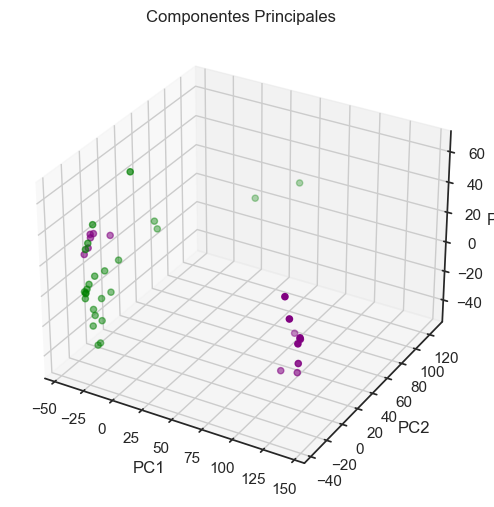

In [40]:

# Asumiendo que Y1 es tu variable de etiquetas
colormap = {'Bio': 'green', 'Pla': 'purple'}
colors = [colormap[x] for x in Y1['Estado']]
datos_pca1 = pd.concat([Y1, pd.DataFrame(datos_pca)], axis=1)

# Visualización en 3D de los primeros tres componentes principales
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Puedes ajustar la cantidad de puntos a mostrar según tus necesidades
num_points = 100
ax.scatter(datos_pca1[0][:num_points], datos_pca1[1][:num_points], datos_pca1[2][:num_points], c=colors, cmap='viridis', marker='o')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Componentes Principales')

plt.show()

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


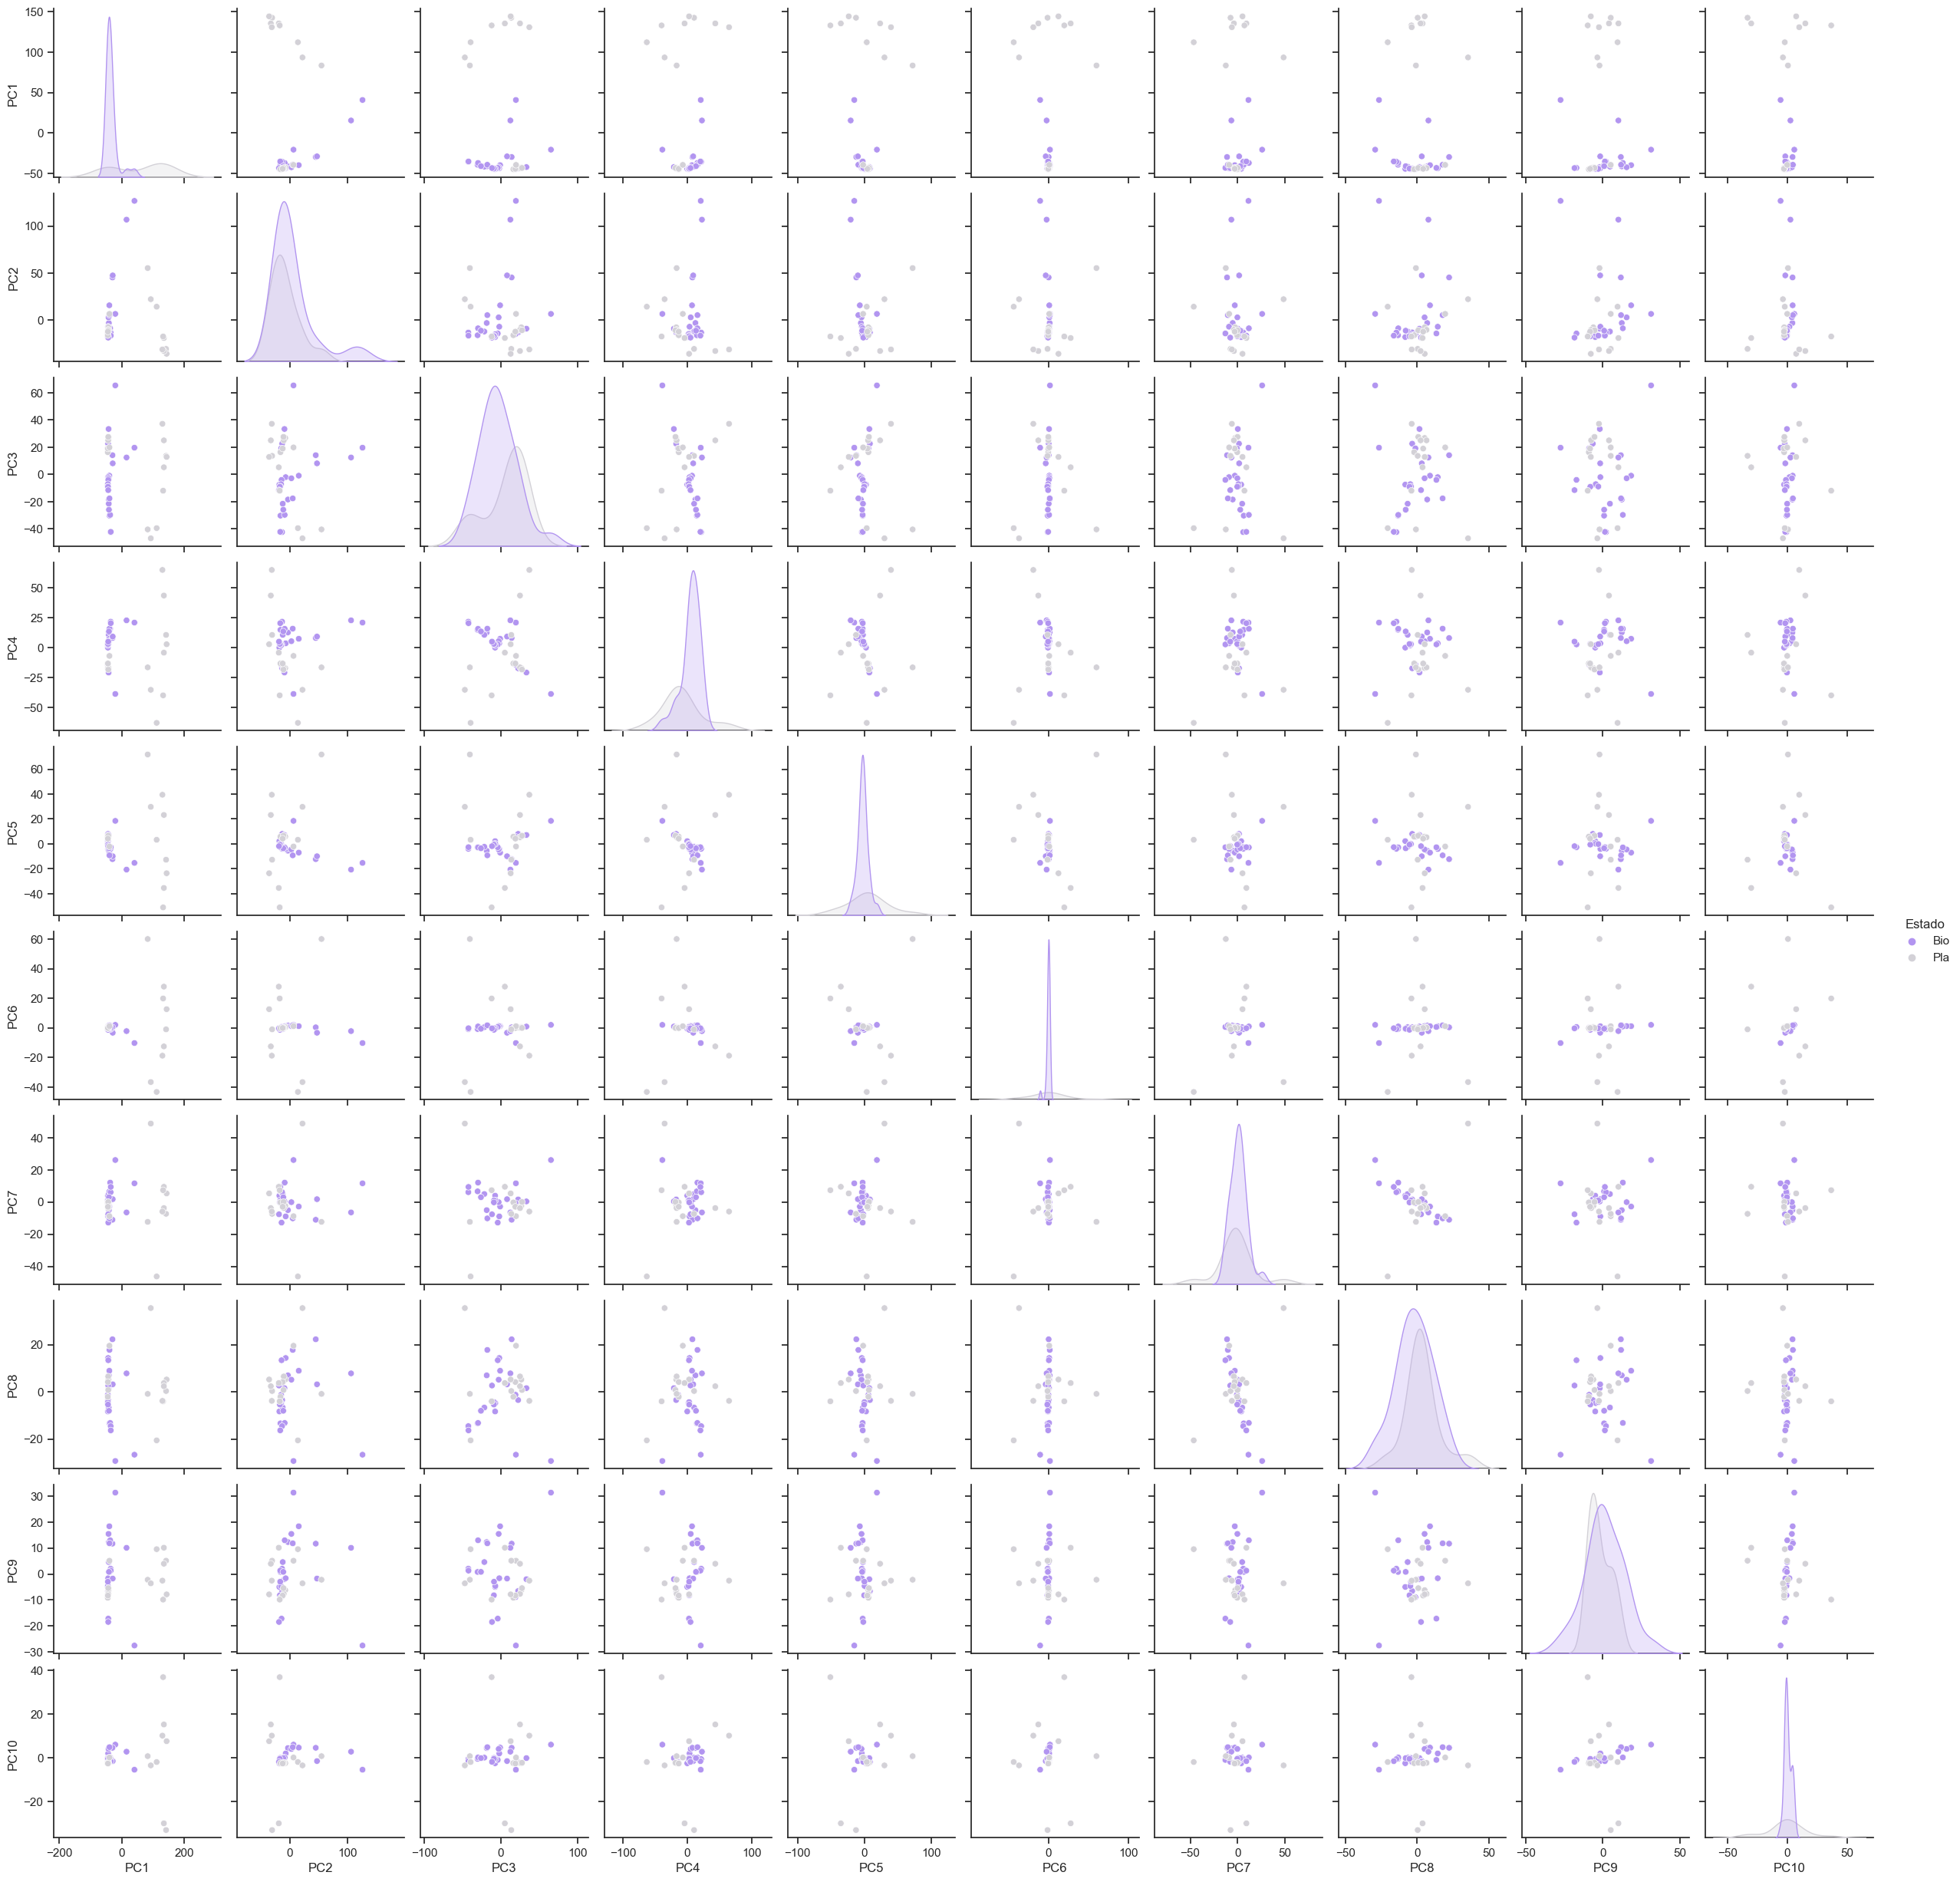

In [30]:
# Define una paleta de colores personalizada con colores más oscuros
custom_palette = ["#B295F0", "#D3D1D7"]  # Rojo oscuro y azul oscuro
Datos_pcaEt=pd.concat([Y1, scores_df], axis=1)
# Crea un diagrama de pares utilizando la paleta de colores personalizada
sns.set(style="ticks")
sns.pairplot(Datos_pcaEt , hue="Estado", palette=custom_palette)
# Muestra el diagrama de pares
plt.show()

In [7]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

encoder = OrdinalEncoder()
encoder.fit(Y1[['Estado']])
Y1_code = encoder.transform (Y1[['Estado']])
Y1_code = pd.DataFrame(Y1_code)

In [8]:
Y1_code.shape

(40, 1)

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

modeloANN = MLPClassifier(hidden_layer_sizes=(20, 20), 
learning_rate_init=0.01, solver = 'lbfgs', max_iter = 5000, random_state = 4)
kf = KFold(n_splits=4, shuffle=True, random_state=123)

puntuaciones = cross_val_score(modeloANN, x_scaled.T, Y1_code.values.ravel(), cv=kf, scoring='f1')

# Imprime las puntuaciones obtenidas en cada fold
print("Puntuaciones de cada fold:", puntuaciones)

# Imprime la puntuación media y su desviación estándar
print("Puntuación media:", np.mean(puntuaciones))
print("Desviación estándar de las puntuaciones:", np.std(puntuaciones))

Puntuaciones de cada fold: [1.         0.8        0.88888889 1.        ]
Puntuación media: 0.9222222222222223
Desviación estándar de las puntuaciones: 0.08388704928078608


In [10]:
# Ahora, puedes obtener el reporte de clasificación promediado sobre los folds
y_pred_cv = cross_val_predict(modeloANN, x_scaled.T, Y1_code.values.ravel(), cv=kf)
Matriz = confusion_matrix(Y1_code, y_pred_cv)
Reporte = classification_report(Y1_code, y_pred_cv)

print(Matriz)
print(Reporte)

[[25  0]
 [ 2 13]]
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        25
         1.0       1.00      0.87      0.93        15

    accuracy                           0.95        40
   macro avg       0.96      0.93      0.95        40
weighted avg       0.95      0.95      0.95        40



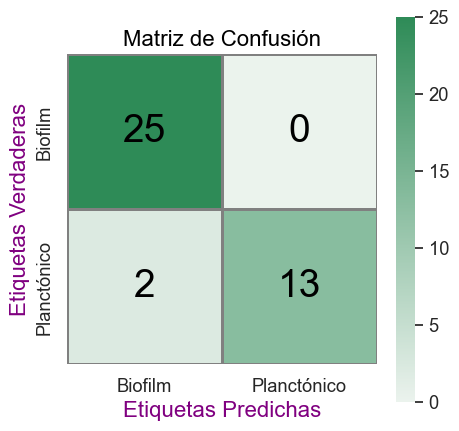

In [11]:
# Colores personalizados
cmap = sns.light_palette("seagreen", as_cmap=True)

# Crea un mapa de calor (heatmap) con Seaborn
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)  # Ajusta el tamaño de la fuente

# Ajusta el tamaño de fuente y otros atributos de texto dentro de la matriz
annot_kws = {"size": 28, "color": "black"}

sns.heatmap(Matriz, annot=True, fmt='d', cmap=cmap, cbar=True, square=True,
            xticklabels=['Biofilm', 'Planctónico'],
            yticklabels=['Biofilm', 'Planctónico'], linewidths=1, linecolor='gray',
            annot_kws=annot_kws)  # Aplica las configuraciones de annot_kws

plt.xlabel('Etiquetas Predichas', fontsize=16, color='purple')
plt.ylabel('Etiquetas Verdaderas', fontsize=16, color='purple')
plt.title('Matriz de Confusión', fontsize=16, color='black')
plt.savefig('Matriz ANN1', dpi=300)

plt.show()

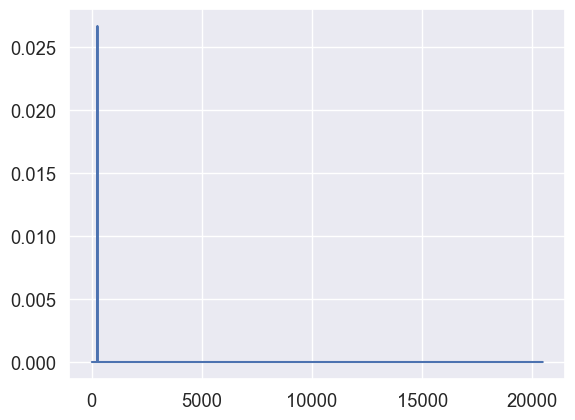

In [12]:
from sklearn.inspection import permutation_importance
import timeit


ANN = MLPClassifier(hidden_layer_sizes=(20, 20), learning_rate_init=0.01, solver = 'lbfgs', max_iter = 5000, random_state = 4)
ANN.fit(x_scaled.T, Y1_code.values.ravel())


# Variables de más importancia
res = permutation_importance(ANN, x_scaled.T, Y1_code.values.ravel(), scoring='recall')
v_imp = res.importances_mean
plt.plot(v_imp)

#score = cross_val_score(modeloSVC1, x_scaled.T, Y1_code.values.ravel(), cv=kf, scoring='recall')

#score = svc.score(x_test.T, y_test)
#print('Score: %.2f' % score.mean())